# 环涂色问题

In [1]:
def F(N,M):
    if N==1:
        return M
    if N==2:
        return M*(M-1)
    if N==3:
        return M*(M-1)*(M-2)
    return (M-1)*F(N-2,M) + (M-2)*F(N-1,M)

def DP(n, m):
    f1 = m
    f2 = m*(m-1)
    f3 = m*(m-1)*(m-2)
    if n==1:
        return f1
    if n==2:
        return f2
    if n==3:
        return f3
    for i in range(4, n+1):
        f = (m-1)*f2 + (m-2)*f3
        f2, f3 = f3, f
    return f
    
    

if __name__=="__main__":
    n, m = 5, 5
    print(F(n,m))
    print((-1)**n*(m-1) + (m-1)**n)
    print(DP(n, m))

1020
1020
1020


# 错排问题

In [2]:
def cuopai(n):
    if n==1:
        return 0
    if n==2:
        return 1
    return (n-1)*(cuopai(n-1)+cuopai(n-2))

def f(n):
    j = 1
    s = 1
    for i in range(1, n+1):
        j = j*i
        s += 1/((-1)**i*j)
    return int(j*s)

def DP_cuopai(n):
    f1, f2 = 0, 1
    if n==1:
        return f1
    if n==2:
        return f2
    for i in range(3, n+1):
        f = (i - 1)*(f1 + f2)
        f1, f2 = f2, f
    return f

if __name__=="__main__":
    n = 6
    print(cuopai(n))
    print(f(n))
    print(DP_cuopai(n))

265
265
265


# 分治算法

## 26字符解码方式

In [24]:
class solution(object):
    def Recursive(self, S, index):
        if index == 0:
            return 0 if S[index]=='0' else 1
        if S[index] == '0' and S[index - 1] in {'1', '2'}:
            return self.Recursive(S, index - 2) if index >= 2 else 1
        elif S[index] == '0':
            return 0
        elif 11 <= int(S[index - 1:index + 1]) <= 19 or 21 <= int(S[index - 1:index + 1]) <= 26:
            return self.Recursive(S, index - 1) + self.Recursive(S, index - 2) if index>=2 else\
            self.Recursive(S, index - 1) + 1
        else:
            return self.Recursive(S, index - 1)

if __name__ == "__main__":
    S = '129911021'
    print(solution().Recursive(S, len(S) - 1))

4


# 动态规划

## 回文子串最小划分次数

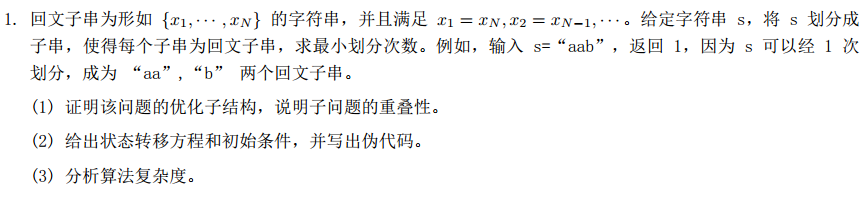

In [71]:
class solution(object):
    def DP(self, S):
        # 使用F[i][j]来记录从i到j是否是回文串
        # 使用B[i]来记录从i到n的最小划分次数
        # F初始值，F[i][i] = 1 for i in range(0, n-1)
        # B初始值，B[i] = i for i in range(n-1, -1, -1)
        # F递归方程：F[i][j] = (F[i+1][j-1] and S[i]==S[j]); if j>=i+2
        # F递归方程：F[i][j] = (S[i]==S[j]); if j=i+1
        # F递归方程：F[i][j] = (S[i]==S[j]); if j=i
        # B递归方程：B[i] = min(B[i], B[j+1]+1) for j in range(i+1, n); if F[i][j]=1
        # B递归方程：注意边界条件，当j等于n-1时，j+1会越界
        n = len(S)
        # 计算F
        F = []
        for i in range(n):#初始化
            F.append([0 for j in range(n)])
        for i in range(n):#从每一条对角线计算，总共有[0,n-1]条对角线
            for j in range(n-i):#对角线上元素的个数，第0条对角线上总共有[0,n-1]个元素
                x,y = j,j+i
                if x==y:
                    F[x][y] = 1
                elif y==x+1:
                    F[x][y] = 1 if (S[x]==S[y]) else 0
                else:#由于x=n-1时，y=n-1；y=0时，x=0;不会出现越界情况
                    F[x][y] = 1 if (F[x+1][y-1] and S[x]==S[y]) else 0
        #for i in F:
        #   print(i)
        # 计算B
        B = [i for i in range(n-1, -1, -1)]#初始化
        for i in range(n-2, -1, -1):#计算
            for j in range(i+1, n):
                if F[i][j] and j<n-1:
                    B[i] = min([B[i], B[j+1]+1])
                elif F[i][j]:#如果从i到n-1是回文串，那么最小划分次数为0
                    B[i] = 0
            #print(B)
        return B[0]
        

if __name__ == "__main__":
    S = 'ababab'
    print(solution().DP(S))

1


## 树塔问题

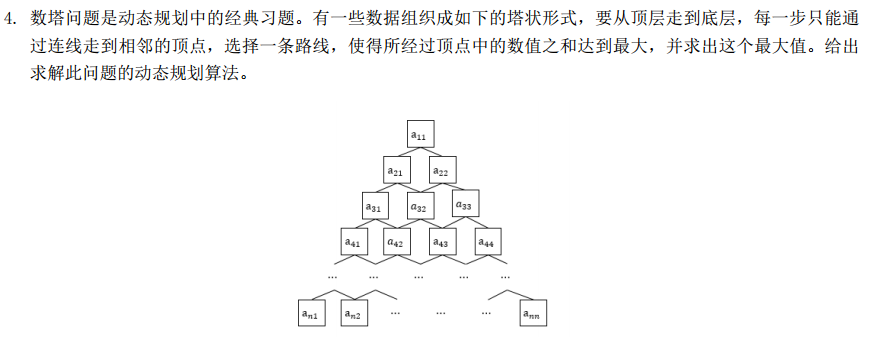

In [84]:
class solution(object):
    def DP(self, A, n):
        # 树塔总长(n+1)*n/2
        # C[1,2,3....,n]用于存储路径，0代表左走，1代表往右走
        L = len(A)
        C = [0 for _ in range(L)]
        B = A[:]
        for i in range(n, 0, -1):# 从底层开始
            #第i层的起始坐标
            end = L
            start = L-i
            L = start
            for j in range(start, end):
                if i==n:#如果在最底层，最大值为对应值
                    A[j] = A[j]
                else:#如果不在最底层，找到左右儿子
                    lchild = j+i
                    rchild = j+i+1
                    C[j] = 0 if A[lchild]>=A[rchild] else 1
                    A[j] += A[lchild] if A[lchild]>=A[rchild] else A[rchild]
        
        #构造最优解
        result = [B[0]]
        curIndex = 0
        for i in range(1, n):#从顶层开始
            curIndex += i+1 if C[curIndex] else i
            result.append(B[curIndex])
            
        return A[0],result
        

if __name__ == "__main__":
    S = [i for i in range(10)]
    S = [2,4,5,8,9,1,4,6,3,7]
    print(solution().DP(S, 4))

(22, [2, 5, 9, 6])


## 第n个丑数

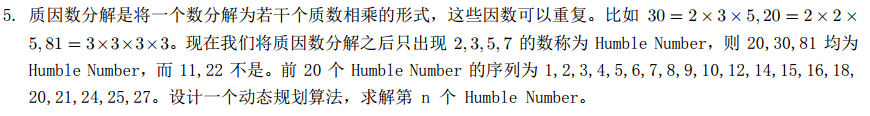

In [93]:
class solution(object):
    def DP(self, n):
        res = []
        # 1,2,3,4,5,6.
        # 需要记录下一个需要乘2,3,5,7的数的位置
        # 当2,3,5,7都指向位置0,那么比较1*2,1*3,1*5,1*7
        p2, p3, p5, p7 = 0, 0, 0, 0
        for i in range(1, n+1):
            if i == 1:
                res.append(1)
            else:
                res.append(min(res[p2]*2, res[p3]*3, res[p5]*5, res[p7]*7))
                if res[-1] == res[p2]*2:
                    p2 += 1
                if res[-1] == res[p3]*3:
                    p3 += 1
                if res[-1] == res[p5]*5:
                    p5 += 1
                if res[-1] == res[p7]*7:
                    p7 += 1

        return res
        

if __name__ == "__main__":
    S = 20
    print(solution().DP(S))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 24, 25, 27]


# 实用Python语句

## 数值交换

In [28]:
m1, m2 = 1, 3
m2, m1 = m1, m2
print(m1, m2)

3 1


## if else 简写三元语句

In [29]:
a, b = 1, 2
c = a if a>b else b
print(c)

2


## lambda语句

对函数的简写，不会增加运行效率，只是用来简写代码  
如果能用for...in...if来完成的，坚决不要用lambda，因为可读性更高

In [30]:
lambda_func = lambda arg: arg+1
print(lambda_func(10))

11


### map

遍历序列，对序列中每个元素进行操作，最终获取新的序列。
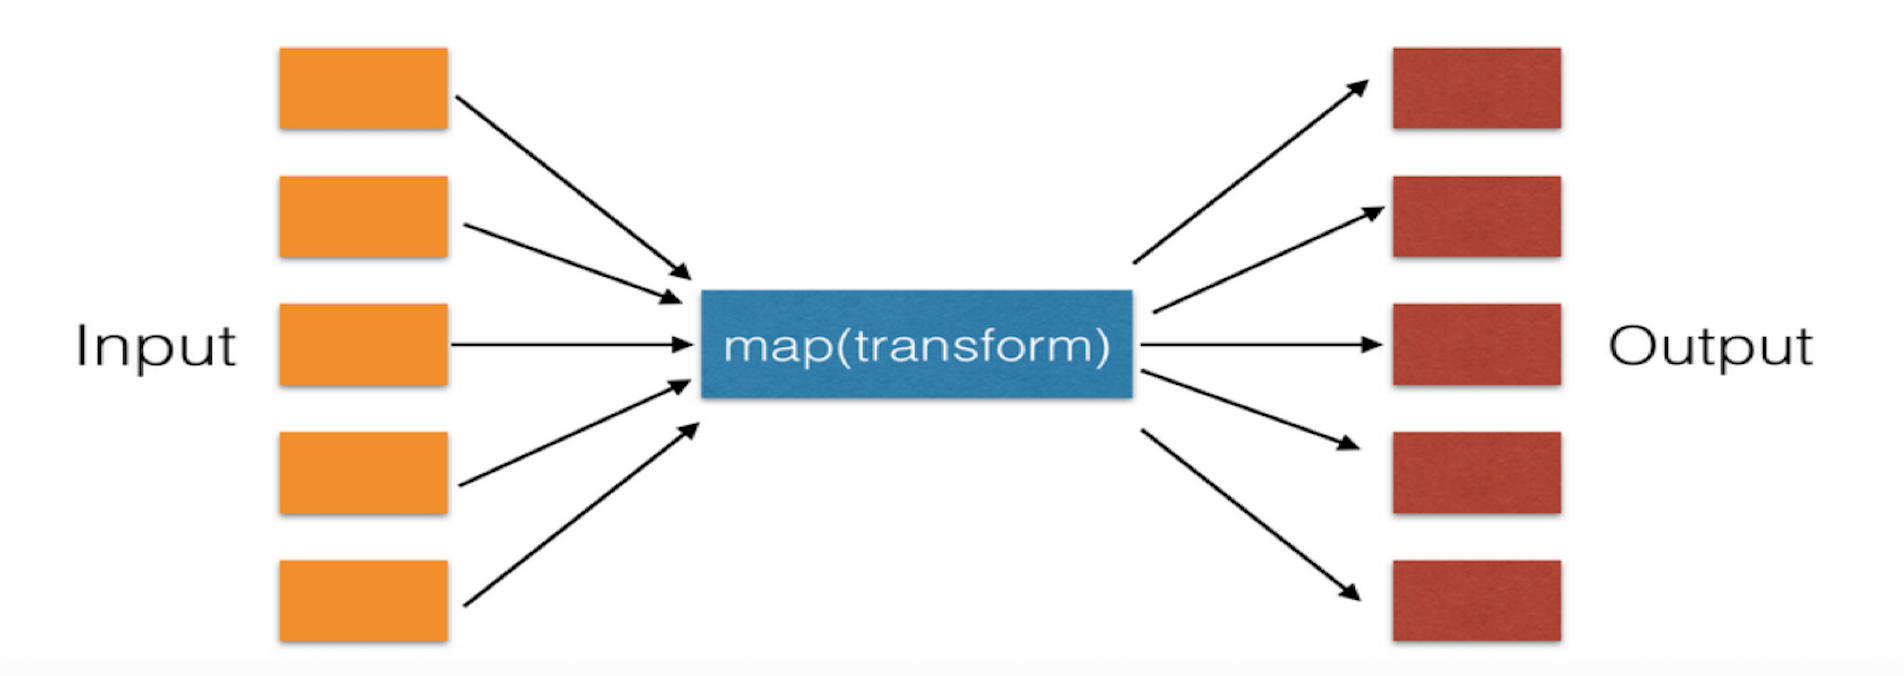

In [38]:
# 将数组中的元素平方
a = [i for i in range(1, 10)]
a = map(lambda a, b: a*b, a, a)
print(list(a))
# 使用for...in...if
a = [i for i in range(1, 10)]
print([i**2 for i in a])

[1, 4, 9, 16, 25, 36, 49, 64, 81]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


### filter

对于序列中的元素进行筛选，最终获取符合条件的序列
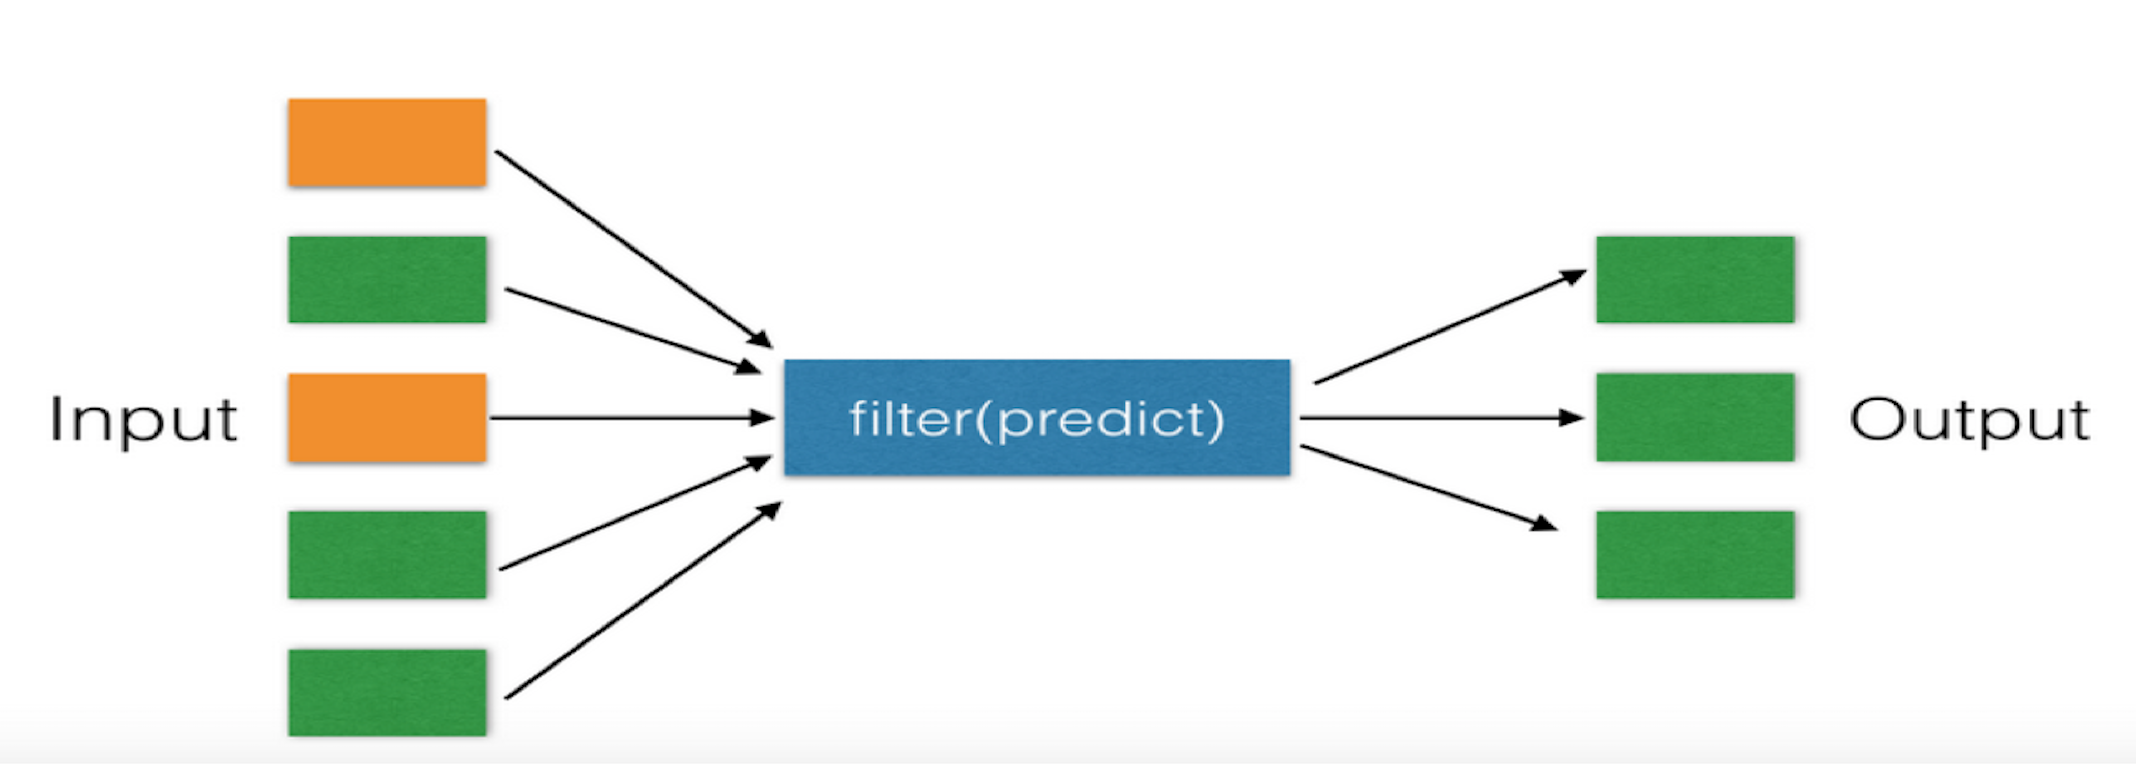

In [46]:
li = [11, 22, 33]
new_list = filter(lambda arg: arg > 22, li)
print(list(new_list))
# 使用for...in...if
print([i for i in li if i>22])

[33]
[33]


### reduce

对于序列内所有元素进行累计操作  
reduce在Python3从全局函数中移除了  
放到了functools中

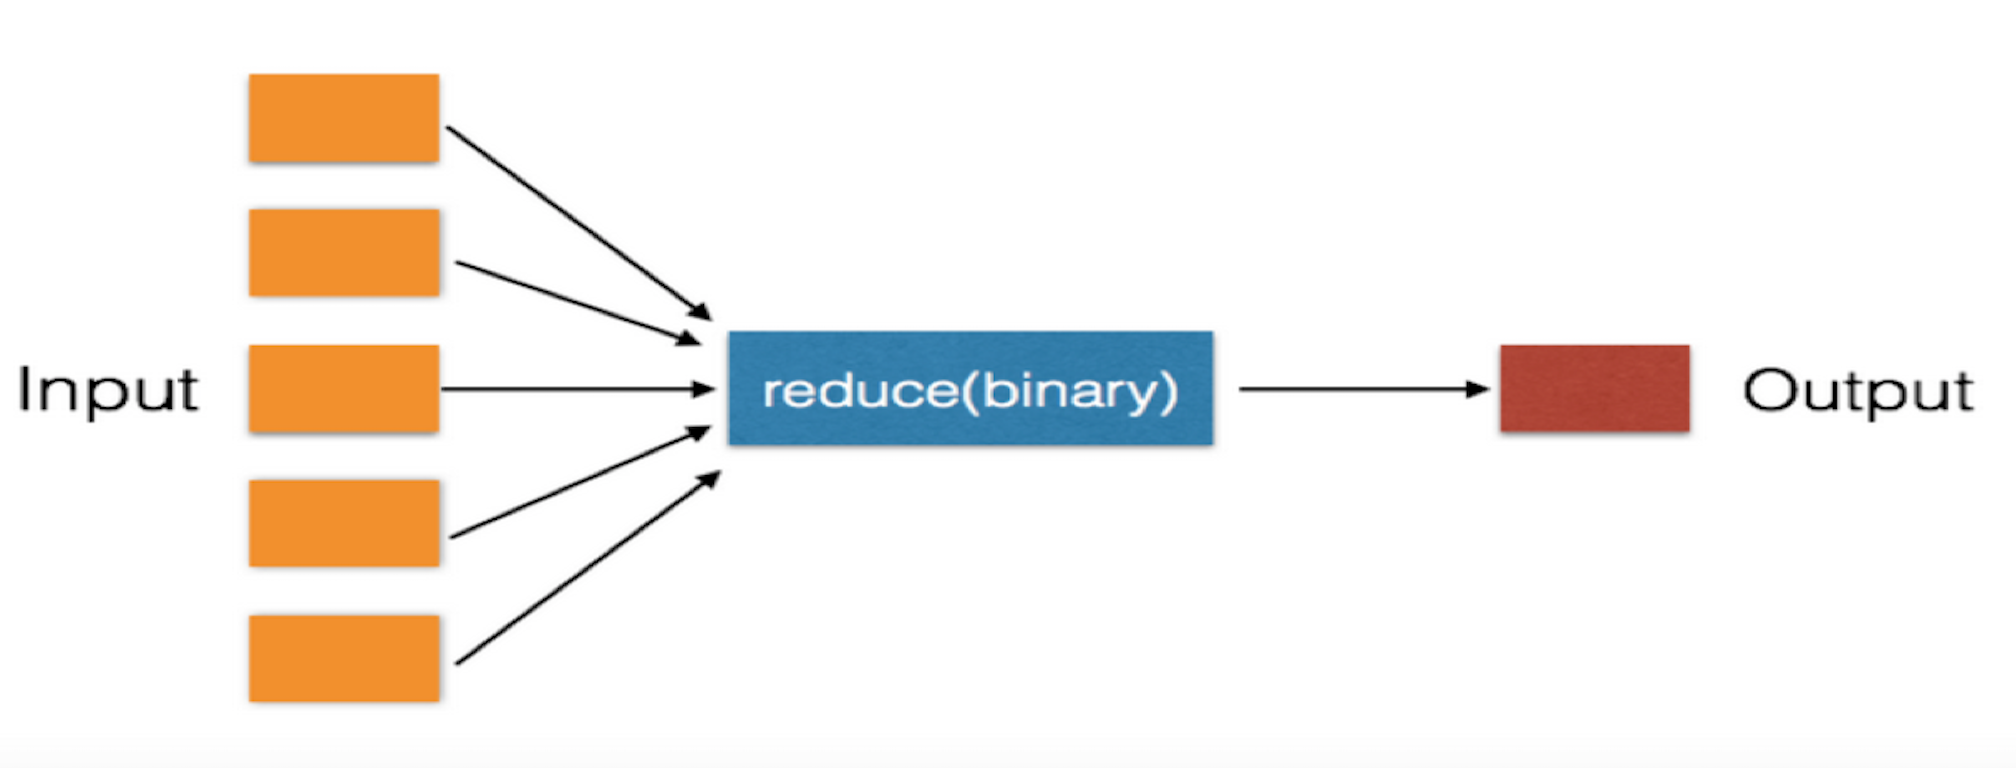

In [45]:
from functools import reduce
li = [11, 22, 33]
result = reduce(lambda arg1, arg2: arg1 + arg2, li)
print(int(result))

66
